In [1]:
import sys
import os
from os.path import split, join
base_dir = split(os.getcwd())[0]
if base_dir not in sys.path:
    sys.path.append(base_dir)
from utilities.basic import list_subdir
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import pickle
import json

In [27]:
data_dir = join(base_dir, 'data')
tables_dir = join(data_dir, 'tables')
data_long_dir = join(data_dir, 't1_longitudinal')
disk_dir = "F:\\"
br_df = pd.read_csv(join(disk_dir,"CoBra\\Data\\volume_longitudinal_nii\\Brain_Regions.csv"))
pred_dir = join(disk_dir, "CoBra\\Data\\volume_longitudinal_nii\\prediction")
    
pred_df = pd.read_feather(join(data_long_dir, 'results', 'volume_prediction_results.feather'))
with open(join(data_long_dir, "sids_long_new.pkl"), 'rb') as f:
    long_sids_ls = pickle.load(f)
with open(join(data_long_dir, "sids_long_stroke.pkl"), 'rb') as f:
    stroke_sids_ls = pickle.load(f)
with open(join(tables_dir, 'newIDs_dic.pkl'), 'rb') as f:
    id_dic = pickle.load(f)
with open(join(data_long_dir, "sids_long_new.pkl"), 'rb') as f:
    sids_ls = pickle.load(f)
with open(join(tables_dir, "disk_series_directories.json"), 'rb') as f:
    dir_dic = json.load(f)
inv_id_map = {v: k for k, v in id_dic.items()}
#dcm_dirs = {newid:os.path.normpath(dir_dic[inv_id_map[newid]]) for newid in newids}

df = pred_df[pred_df.SeriesInstanceUID.isin(long_sids_ls)]
corrected_outliers = ['109983', '047205', '083072', '109644', '287546', '258402',
                '258387', '258391', '258394','258397','258402', '258403']
rerun_conversion_files = ['109983', '047205', '083072', '109644', '287546',]

In [26]:
# pred_df = pred_df[~pred_df.newID.isin(corrected_outliers)]
# pred_df = pred_df.reset_index(drop=True)
# pred_df.to_feather(join(data_long_dir,'results', 'volume_prediction_results.feather'))

## Segmented brain regions

## Whole brain volume dist

<AxesSubplot:ylabel='Whole_Brain'>

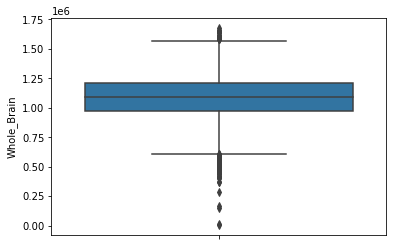

In [20]:
sns.boxplot(data = df, y='Whole_Brain')

## Outliers

In [29]:
wb_outliers_df = pred_df[np.abs(stats.zscore(pred_df.Whole_Brain)) > 3.5]
outliers_ids = list(wb_outliers_df.newID)


corr_sids_ls = [inv_id_map[id] for id in outliers_ids]
dcm_dirs = {sid:os.path.normpath(dir_dic[sid]) for sid in corr_sids_ls}
outliers_sids = [inv_id_map[id] for id in outliers_ids]
#print(outliers_ids)
#print(outliers_sids)

In [22]:
failed_seg_paths = [(join(pred_dir, id+'_1mm.nii.gz'), join(pred_dir, id+'_1mm_seg.nii.gz')) for id in outliers_ids]
with open(join(data_long_dir, "failed_seg.pkl"), 'wb') as f:
    pickle.dump(failed_seg_paths, f)

## Brain regions of interest

In [58]:
br_ls = list(df.keys())
def get_br_ls(key=''):
    print([f for f in br_ls if key in f])

In [59]:
get_br_ls('Gy')

['Right_Hippocampus', 'Left_Hippocampus']


In [ ]:
affected_br_dic = {'left Rolandic operculum':get_br_ls('Op'),
                'olfactory bulb':[], 'bilateral insulas':get_br_ls('Ins'),
                'bilateral hipocampi':get_br_ls('Hip'),
                }


NameError: name 'stroke_ls' is not defined